In [ ]:
!pip install pandas numpy scikit-learn tensorflow google-cloud-bigquery


LINEAR REGRESSION MODEL


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.cloud import bigquery

client = bigquery.Client(project="angelic-bond-455013-b9")

query = """
SELECT dt, AverageTemperature, AverageTemperatureUncertainty, City, Country, Latitude, Longitude
FROM `angelic-bond-455013-b9.climate.india_temperature_data`
ORDER BY dt ASC
"""

df = client.query(query).to_dataframe()




In [ ]:
df = df.dropna()

df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
df['quarter'] = df['dt'].dt.quarter

df.drop(columns=['dt'], inplace=True)

In [ ]:
df.dtypes

,0
AverageTemperature,float64
AverageTemperatureUncertainty,float64
City,object
Country,object
Latitude,object
Longitude,object
year,int32
month,int32
day,int32
quarter,int32


In [ ]:
df=df.drop(columns=["Country"])

In [ ]:
def process_lat_lon(value):
    if 'N' in value:
        return float(value[:-1])
    elif 'S' in value:
        return -float(value[:-1])
    elif 'E' in value:
        return float(value[:-1])
    elif 'W' in value:
        return -float(value[:-1])
    return float(value)

df['Latitude'] = df['Latitude'].apply(process_lat_lon)
df['Longitude'] = df['Longitude'].apply(process_lat_lon)


In [ ]:
df = pd.get_dummies(df, columns=['City'], drop_first=True)

X = df[['year','month','day','quarter','Latitude', 'Longitude', 'AverageTemperatureUncertainty'] + list(df.columns[df.columns.str.startswith('City_')])]
y = df['AverageTemperature']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

RMSE: 4.73
MAE: 3.79
R²: 0.15


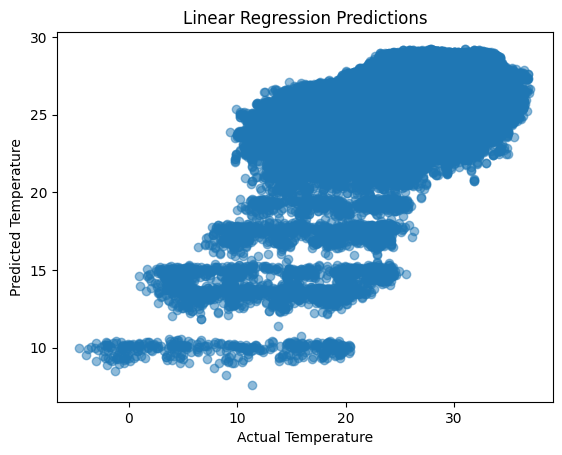

In [ ]:
from sklearn.metrics import r2_score

y_pred = lr_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Linear Regression Predictions")
plt.show()


LSTM-MODEL


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
from google.cloud import bigquery

client = bigquery.Client(project="angelic-bond-455013-b9")
query = """
SELECT dt, AverageTemperature, AverageTemperatureUncertainty, City, Country, Latitude, Longitude
FROM `angelic-bond-455013-b9.climate.india_temperature_data`
ORDER BY dt ASC
"""

# Execute query and store in Pandas DataFrame
df = client.query(query).to_dataframe()



# Drop missing values
df = df.dropna()



In [ ]:
df=df.drop(columns=['Country'])

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
df['quarter'] = df['dt'].dt.quarter
df.drop(columns=['dt'], inplace=True)


In [ ]:
def process_lat_lon(value):
    if 'N' in value:
        return float(value[:-1])
    elif 'S' in value:
        return -float(value[:-1])
    elif 'E' in value:
        return float(value[:-1])
    elif 'W' in value:
        return -float(value[:-1])
    return float(value)

df['Latitude'] = df['Latitude'].apply(process_lat_lon)
df['Longitude'] = df['Longitude'].apply(process_lat_lon)



In [ ]:
df = pd.get_dummies(df, columns=['City'], drop_first=True)

In [ ]:
X = df[['year','month','day','quarter','Latitude', 'Longitude', 'AverageTemperatureUncertainty'] + list(df.columns[df.columns.str.startswith('City_')])]
y = df['AverageTemperature']

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(768438, 397)
(192110, 397)


In [ ]:
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
X_train[:5]

,year,month,day,quarter,Latitude,Longitude,AverageTemperatureUncertainty,City_Achalpur,City_Adilabad,City_Adoni,...,City_Vidisha,City_Vijayawada,City_Virar,City_Visakhapatnam,City_Vizianagaram,City_Warangal,City_Wardha,City_Yamunanagar,City_Yavatmal,City_Yelahanka
971779,2004,7,1,3,12.05,80.55,0.321,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96665,1818,1,1,1,23.31,72.52,2.984,False,False,False,...,False,False,False,False,False,False,False,False,False,False
711409,1949,1,1,1,18.48,79.44,0.496,False,False,False,...,False,False,False,False,False,False,False,False,False,False
595972,1924,6,1,2,20.09,85.31,0.485,False,False,False,...,False,False,False,False,False,False,False,False,False,False
667508,1939,9,1,3,28.13,79.09,0.392,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train_scaled.shape

(768438, 1, 397)

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(7,activation='relu'),
    Dense(1),

])



from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


train_loss = model.evaluate(X_train_scaled, y_train)
test_loss = model.evaluate(X_test_scaled, y_test)

print(f'Train Loss: {train_loss}')
print(f'Test Loss: {test_loss}')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 181s 7ms/step - loss: 35.8889 - val_loss: 4.6592
Epoch 2/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 181s 8ms/step - loss: 3.4446 - val_loss: 0.8766
Epoch 3/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 196s 7ms/step - loss: 1.3383 - val_loss: 0.7836
Epoch 4/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 205s 7ms/step - loss: 1.1679 - val_loss: 0.7470
Epoch 5/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 216s 8ms/step - loss: 1.0865 - val_loss: 0.7257
Epoch 6/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 185s 7ms/step - loss: 1.0280 - val_loss: 0.6948
Epoch 7/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 201s 7ms/step - loss: 0.9834 - val_loss: 0.7137
Epoch 8/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 203s 7ms/step - loss: 0.9555 - val_loss: 0.6855
Epoch 9/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 202s 7ms/step - loss: 0.9355 - val_loss: 0.6742
Epoch 10/10
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 199s 7ms/step - loss: 0.9209 - val_loss: 0.7027
24014/24014 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - loss: 0.6914
6004/6004 ━━━━━━━

In [ ]:
X_test_scaled.shape

(192110, 1, 397)

6004/6004 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


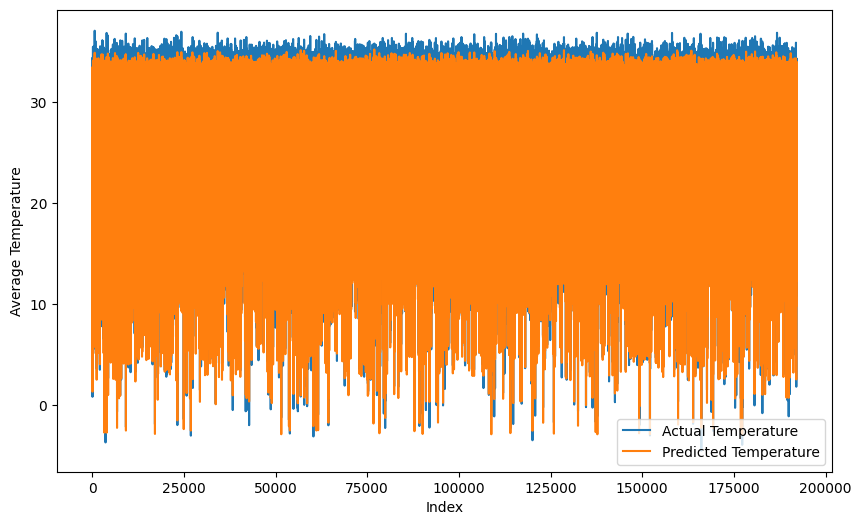

RMSE: 0.84


In [ ]:
import numpy as np
y_pred = model.predict(X_test_scaled)


y_pred = y_pred.squeeze()


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.xlabel('Index')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')


In [ ]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,year,month,day,quarter,City_Achalpur,City_Adilabad,...,City_Vidisha,City_Vijayawada,City_Virar,City_Visakhapatnam,City_Vizianagaram,City_Warangal,City_Wardha,City_Yamunanagar,City_Yavatmal,City_Yelahanka
0,19.637,2.270,21.70,77.02,1796,1,1,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,23.642,2.318,15.27,77.50,1796,1,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.173,2.289,23.31,91.75,1796,1,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,14.855,2.339,26.52,78.81,1796,1,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20.507,2.219,18.48,74.37,1796,1,1,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd

def build_input_row(year, month, day, quarter, city, avg_temp_uncertainty, latitude, longitude, city_columns):
    quarter = (month - 1) // 3 + 1

    input_data = {
        'year': year,
        'month': month,
        'day': day,
        'quarter': quarter,
        'Latitude': latitude,
        'Longitude': longitude,
        'AverageTemperatureUncertainty': avg_temp_uncertainty
    }

    for col in city_columns:
        input_data[col] = 0

    city_column = f"City_{city}"
    if city_column in city_columns:
        input_data[city_column] = 1
    else:
        raise ValueError(f"City '{city}' not found in training data.")

    return pd.DataFrame([input_data])

X_input = build_input_row(
    year=1796,
    month=1,
    day=1,
    quarter=1,
    city='Achalpur',
    avg_temp_uncertainty=2.270,
    city_columns=city_columns,
    latitude=21.70,
    longitude=77.02,
)

X_input = X_input[model_features]

city_cols_in_input = [col for col in X_input.columns if col.startswith("City_")]
print(X_input[city_cols_in_input].T[X_input.index[0]])

X_scaled = scaler.transform(X_input)

X_scaled = X_scaled.reshape(1, 1, -1)

prediction = model.predict(X_scaled)
print("Prediction:", prediction)


City_Achalpur       1
City_Adilabad       0
City_Adoni          0
City_Agartala       0
City_Agra           0
                   ..
City_Warangal       0
City_Wardha         0
City_Yamunanagar    0
City_Yavatmal       0
City_Yelahanka      0
Name: 0, Length: 390, dtype: int64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Prediction: [[19.132807]]


In [ ]:
model.save('model.h5')  # This creates an HDF5 file


In [ ]:
!ls /content


model_features.pkl  model.h5  sample_data


In [ ]:
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
import pandas as pd
filtered_df = df[df['City_Adilabad'] == 1]
print(filtered_df.head(5))



      AverageTemperature  AverageTemperatureUncertainty  Latitude  Longitude  \
160               21.899                          2.291     20.09      78.48   
541               24.229                          1.548     20.09      78.48   
727               27.295                          2.417     20.09      78.48   
1090              32.387                          1.830     20.09      78.48   
1452              34.907                          1.539     20.09      78.48   

      year  month  day  quarter  City_Achalpur  City_Adilabad  ...  \
160   1796      1    1        1          False           True  ...   
541   1796      2    1        1          False           True  ...   
727   1796      3    1        1          False           True  ...   
1090  1796      4    1        2          False           True  ...   
1452  1796      5    1        2          False           True  ...   

      City_Vidisha  City_Vijayawada  City_Virar  City_Visakhapatnam  \
160          False         

In [ ]:
X_input = build_input_row(
    year=2025,
    month=1,
    day=1,
    quarter=1,
    city='Adilabad',
    avg_temp_uncertainty=2.291,
    city_columns=city_columns,
    latitude=20.09,
    longitude=74.48,
)

X_input = X_input[model_features]

city_cols_in_input = [col for col in X_input.columns if col.startswith("City_")]
print(X_input[city_cols_in_input].T[X_input.index[0]])

X_scaled = scaler.transform(X_input)

X_scaled = X_scaled.reshape(1, 1, -1)

prediction = model.predict(X_scaled)
print("Prediction:", prediction)

City_Achalpur       0
City_Adilabad       1
City_Adoni          0
City_Agartala       0
City_Agra           0
                   ..
City_Warangal       0
City_Wardha         0
City_Yamunanagar    0
City_Yavatmal       0
City_Yelahanka      0
Name: 0, Length: 390, dtype: int64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction: [[22.862381]]
